In [2]:
from PIL import Image
import numpy as np
import math
import scipy.misc
from scipy import signal
from matplotlib.pyplot import imshow, subplot, figure, plot

In [3]:
# input: a number
# returns the next odd integer
def roundToNextOdd(x):
    return np.ceil(x)//2*2+1

# input: a number
# returns: a numpy array that replicates a 1D Gaussian filter
def gauss1d(sigma):
    length = np.round(roundToNextOdd(sigma*6)/2)
    x_vals = np.arange(-length+1, length)
    g_filter = np.exp(- pow(x_vals, 2) / (2*pow(sigma, 2)))
    return g_filter/sum(g_filter)


# input: a number
# returns: a 2D numpy array that replicates a 2D Gaussian filter
def gauss2d(sigma):
    g1d = gauss1d(sigma)
    g1d = g1d[np.newaxis]
    g2d = signal.convolve2d(g1d.transpose(), g1d)
    return g2d


# input: the desired width of the square filter
# returns: a numpy array of normalized values.
# throws: AssertionError if number is not odd, not positive or not an integer
def boxfilter(n):
    assert(n%2 != 0), 'Size a given is not odd.'
    assert(n > 0), 'Size given is not positive.'
    return np.ones((n, n))/(n*n)  


def boxfil(array,n):     #boxfilter 
    gd = boxfilter(n)
    return signal.convolve2d(array, gd, 'same')

# input: an image and a sigma for the gaussian filter
# returns: the image convolved with the 2D filter
def gaussconvolve2d(array, sigma):
    g2d = gauss2d(sigma)
    return signal.convolve2d(array, g2d, 'same')


In [17]:
dog_image = Image.open('dog.bmp');
dog_image = np.asarray(dog_image);

cat_image = Image.open('cat.bmp');
cat_image = np.asarray(cat_image);

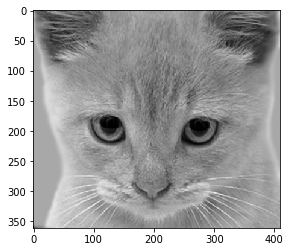

In [25]:
im = Image.open('cat.bmp');
im = im.convert('L'); #GREYSCALE
imshow(im, cmap="gray");



BOX Filter used below, the image seems almost the same as original

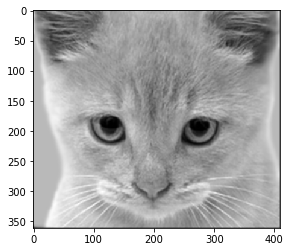

In [19]:
im = np.asarray(im)
box_image = boxfil(im,3)
imshow(box_image, cmap="gray")


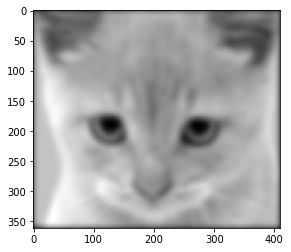

In [36]:
im = np.asarray(im);
conv_image = gaussconvolve2d(im, 5);
imshow(conv_image, cmap="gray");

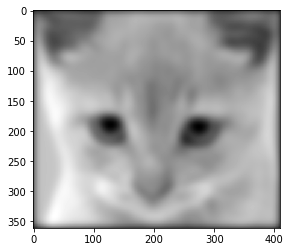

In [21]:
im = np.asarray(im);
conv_image = gaussconvolve2d(im, 7);
imshow(conv_image, cmap="gray");

As we increase the sigma for the gaussian kernel, the more the figure is getting blured. 

# Hybrid Image

In [9]:
def blurerRGB(img, sigma):
    r = Image.fromarray(gaussconvolve2d(img[:,:,0], sigma)).convert('L');
    g = Image.fromarray(gaussconvolve2d(img[:,:,1], sigma)).convert('L');
    b = Image.fromarray(gaussconvolve2d(img[:,:,2], sigma)).convert('L');
    bands = [r, g, b]
    return Image.merge('RGB', bands);


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


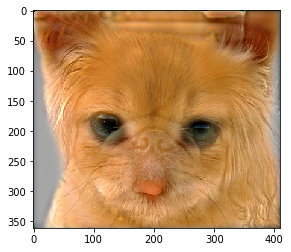

In [66]:
sigma = 5
low_dog = dog_image-blurerRGB(dog_image, sigma)+128;
blur_cat = blurerRGB(cat_image, sigma)
combo3 = np.asarray(blur_cat)/255+low_dog/255-0.5;
imshow(combo3);

# DE-hybrid image

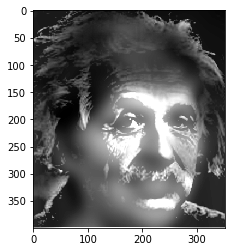

In [35]:
fig_einstein = Image.open('einsteinandwho.png');
imshow(fig_einstein, cmap="gray")

LOW-freq image 

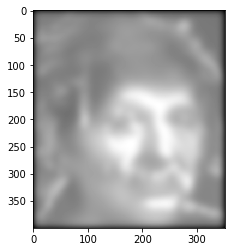

In [33]:
im2 = np.asarray(fig_einstein);
conv_image2 = gaussconvolve2d(im2, 7)
imshow(conv_image2, cmap="gray");

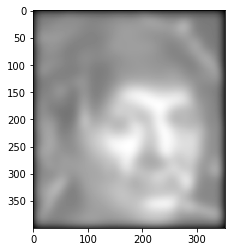

In [34]:
im2 = np.asarray(fig_einstein);
conv_image2 = gaussconvolve2d(im2, 9)/255
imshow(conv_image2, cmap="gray");


High-scaled image

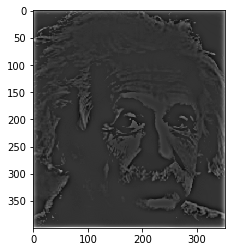

In [30]:
low_e = fig_einstein-gaussconvolve2d(fig_einstein, 5);
imshow(low_e, cmap="gray")

High sharpened image is of Einstein and Low one seems of Dr. Mohsenzadeh :P